## File 2
### In this Python file we have imported the manipulated CSV (excel) file. We did more data wrangling, model training and concluded some result in this file. 


In [ ]:
## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("bgl.csv")

In [3]:
df.head(2)

,Anomaly Status,Id,Message,Failed,Error,Interrupt,Stopping,Terminated,Bad,Timed out,Corrected,Generating,Loading,Warning,Core,Invalid,Detected,Critical
0,0,1117838570,instruction cache parity error corrected,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1117838570,instruction cache parity error corrected,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
df.shape

(133800, 18)

In [5]:
df = df.groupby(['Id', 'Anomaly Status', 'Message']).sum().reset_index()

In [6]:
df.head()

,Id,Anomaly Status,Message,Failed,Error,Interrupt,Stopping,Terminated,Bad,Timed out,Corrected,Generating,Loading,Warning,Core,Invalid,Detected,Critical
0,1117838570,0,instruction cache parity error corrected,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0
1,1117838571,0,instruction cache parity error corrected,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0
2,1117838572,0,instruction cache parity error corrected,0,7,0,0,0,0,0,7,0,0,0,0,0,0,0
3,1117838573,0,instruction cache parity error corrected,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0
4,1117838574,0,instruction cache parity error corrected,0,7,0,0,0,0,0,7,0,0,0,0,0,0,0


In [7]:
df.shape

(66095, 18)

In [ ]:
## MORE DATA WRANGLING

In [8]:
len(df[df["Anomaly Status"]==1])

9191

In [9]:
df.columns

Index(['Id', 'Anomaly Status', 'Message', 'Failed', 'Error', 'Interrupt',
       'Stopping', 'Terminated', 'Bad', 'Timed out', 'Corrected', 'Generating',
       'Loading', 'Warning', 'Core', 'Invalid', 'Detected', 'Critical'],
      dtype='object')

In [10]:
df.drop(["Id", "Message"], axis=1, inplace=True)

In [11]:
df.head()

,Anomaly Status,Failed,Error,Interrupt,Stopping,Terminated,Bad,Timed out,Corrected,Generating,Loading,Warning,Core,Invalid,Detected,Critical
0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0
1,0,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0
2,0,0,7,0,0,0,0,0,7,0,0,0,0,0,0,0
3,0,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0
4,0,0,7,0,0,0,0,0,7,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66095 entries, 0 to 66094
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Anomaly Status  66095 non-null  int64
 1   Failed          66095 non-null  int64
 2   Error           66095 non-null  int64
 3   Interrupt       66095 non-null  int64
 4   Stopping        66095 non-null  int64
 5   Terminated      66095 non-null  int64
 6   Bad             66095 non-null  int64
 7   Timed out       66095 non-null  int64
 8   Corrected       66095 non-null  int64
 9   Generating      66095 non-null  int64
 10  Loading         66095 non-null  int64
 11  Warning         66095 non-null  int64
 12  Core            66095 non-null  int64
 13  Invalid         66095 non-null  int64
 14  Detected        66095 non-null  int64
 15  Critical        66095 non-null  int64
dtypes: int64(16)
memory usage: 8.1 MB


In [13]:
df['Anomaly Status'].unique()

array([0, 1])

In [14]:
df.describe()

,Anomaly Status,Failed,Error,Interrupt,Stopping,Terminated,Bad,Timed out,Corrected,Generating,Loading,Warning,Core,Invalid,Detected,Critical
count,66095.000000,66095.000000,66095.000000,66095.000000,66095.000000,66095.0,66095.0,66095.000000,66095.000000,66095.000000,66095.000000,66095.000000,66095.000000,66095.000000,66095.000000,66095.000000
mean,0.139057,0.070974,0.491732,0.375732,0.000076,0.0,0.0,0.000182,0.209895,0.156517,0.115228,0.006687,0.171011,0.151827,0.230123,0.097481
std,0.346009,0.351973,1.469767,2.714892,0.008697,0.0,0.0,0.013473,0.703698,0.363348,1.061891,0.083157,0.465177,1.178217,0.503022,0.972096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,7.000000,24.000000,35.000000,1.000000,0.0,0.0,1.000000,11.000000,1.000000,24.000000,2.000000,9.000000,24.000000,11.000000,33.000000


In [15]:
labels = df['Anomaly Status']
X = df.drop('Anomaly Status', axis=1)

labels.value_counts()

0    56904
1     9191
Name: Anomaly Status, dtype: int64

### Now, we have started modeling procedure: 

In [16]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.25, random_state=1, stratify=labels)

In [17]:
print(X_train.shape)
print(y_train.value_counts())
print(X_test.shape)
print(y_test.value_counts())

(49571, 15)
0    42678
1     6893
Name: Anomaly Status, dtype: int64
(16524, 15)
0    14226
1     2298
Name: Anomaly Status, dtype: int64


In [18]:
# Instantiate and fit the RandomForestClassifier
anomaly_detection_model = RandomForestClassifier()
anomaly_detection_model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Make predictions for the test set
y_pred_test = anomaly_detection_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_test)

0.9914064391188574

In [21]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[14096,   130],
       [   12,  2286]])

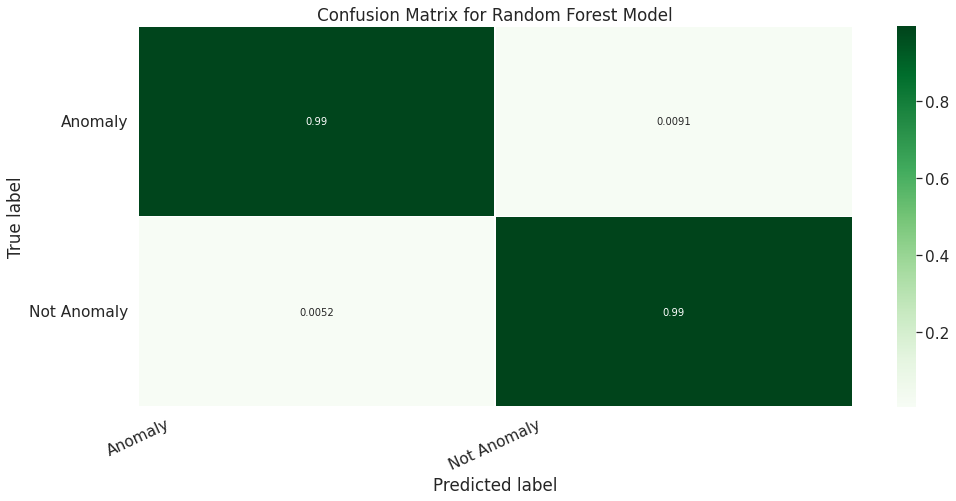

In [22]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Anomaly', 'Not Anomaly']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [23]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14226
           1       0.95      0.99      0.97      2298

    accuracy                           0.99     16524
   macro avg       0.97      0.99      0.98     16524
weighted avg       0.99      0.99      0.99     16524



In [23]:
#########################################################----END----###############################################################